<a href="https://colab.research.google.com/github/Girija-Tandon/Python_Analysis/blob/main/AQI%20%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/Chennai_AQI_Dataset.csv')
df

,City,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3
0,Chennai,01/01/18,93.0,51.15,100.44,77.19,106.02,0.98,88.35
1,Chennai,02/01/18,100.0,55.00,108.00,83.00,114.00,1.05,95.00
2,Chennai,03/01/18,81.0,44.55,87.48,67.23,92.34,0.85,76.95
3,Chennai,04/01/18,169.0,92.95,182.52,140.27,192.66,1.77,160.55
4,Chennai,05/01/18,153.0,84.15,165.24,126.99,174.42,1.61,145.35
...,...,...,...,...,...,...,...,...,...
2546,Chennai,27/12/24,36.0,19.80,38.88,29.88,41.04,0.38,34.20
2547,Chennai,28/12/24,55.0,30.25,59.40,45.65,62.70,0.58,52.25
2548,Chennai,29/12/24,79.0,43.45,85.32,65.57,90.06,0.83,75.05
2549,Chennai,30/12/24,96.0,52.80,103.68,79.68,109.44,1.01,91.20


In [3]:
df.shape

(2551, 9)

In [10]:
df.count()

,0
City,2551
Date,2551
AQI,2550
PM2.5,2551
PM10,2551
NO2,2551
SO2,2551
CO,2551
O3,2551


In [5]:
df.isnull().sum()

,0
City,0
Date,0
AQI,1
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
O3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    2551 non-null   object 
 1   Date    2551 non-null   object 
 2   AQI     2550 non-null   float64
 3   PM2.5   2551 non-null   float64
 4   PM10    2551 non-null   float64
 5   NO2     2551 non-null   float64
 6   SO2     2551 non-null   float64
 7   CO      2551 non-null   float64
 8   O3      2551 non-null   float64
dtypes: float64(7), object(2)
memory usage: 179.5+ KB


**Key Insights:**

AQI and PM2.5/PM10 are often high, indicating air pollution is a recurring issue.

SO2 and NO2 levels are alarmingly high at times — suggestive of industrial or vehicular sources.

Ozone and CO are mostly within acceptable ranges, but ozone sometimes spikes.

Minimum values of 0 for many pollutants may indicate missing data or ideal readings.



In [7]:
df.describe()

,AQI,PM2.5,PM10,NO2,SO2,CO,O3
count,2550.000000,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000
mean,77.336471,42.518385,83.490647,64.164108,88.129016,0.811960,73.440847
std,31.632261,17.414707,34.196152,26.280376,36.095938,0.332532,30.079948
min,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,31.350000,61.560000,47.310000,64.980000,0.600000,54.150000
50%,69.000000,37.950000,74.520000,57.270000,78.660000,0.720000,65.550000
75%,89.000000,48.950000,96.120000,73.870000,101.460000,0.930000,84.550000
max,288.000000,158.400000,311.040000,239.040000,328.320000,3.020000,273.600000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='AQI', ylabel='Count'>

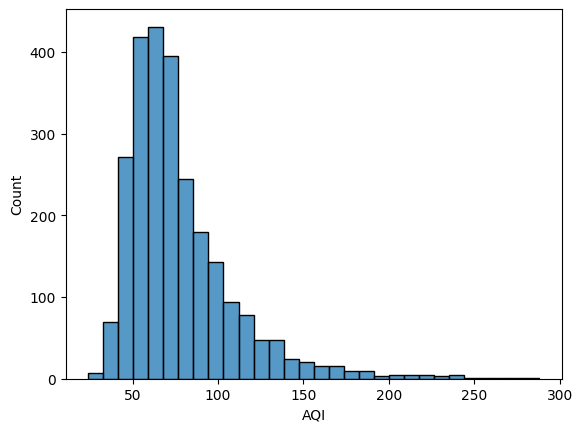

In [12]:
sns.histplot(df['AQI'], bins=30)

<Axes: >

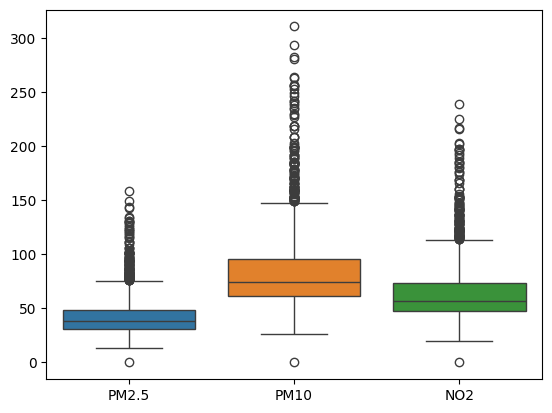

In [14]:
sns.boxplot(data=df[['SO2', 'PM10', 'NO2']])

<Axes: >

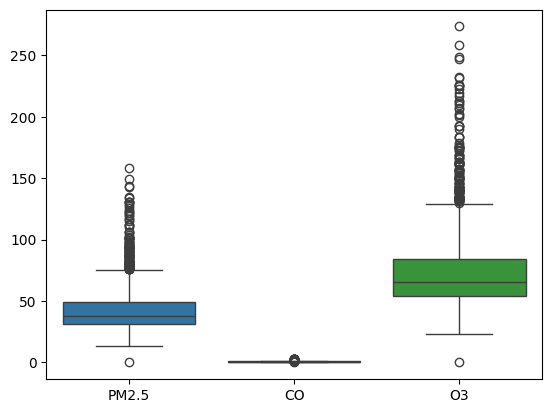

In [15]:
sns.boxplot(data=df[['PM2.5', 'CO', 'O3']])

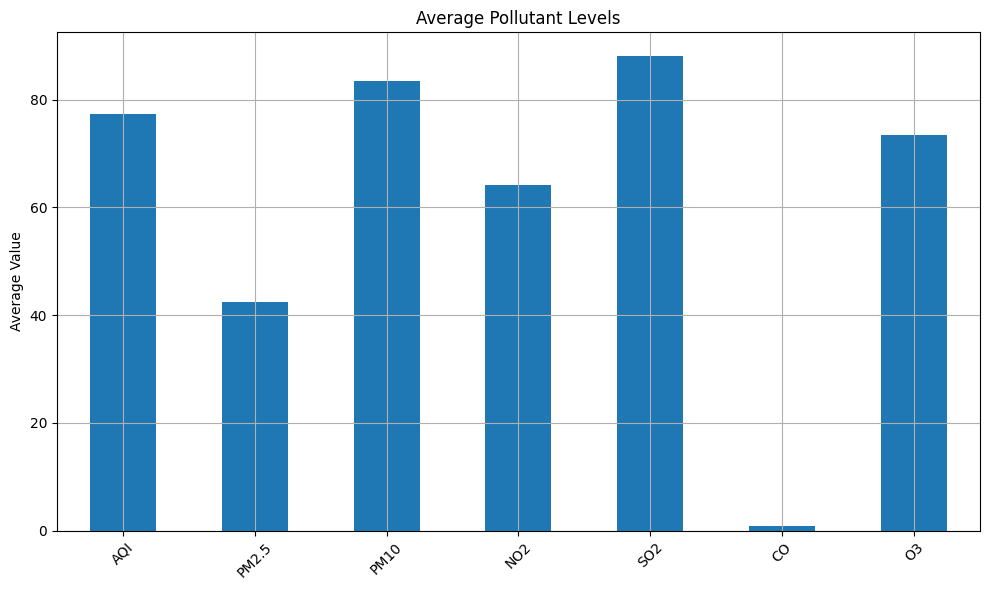

In [17]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Now compute the mean and plot
numeric_df.mean().plot(kind='bar', figsize=(10, 6), title="Average Pollutant Levels")

import matplotlib.pyplot as plt
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


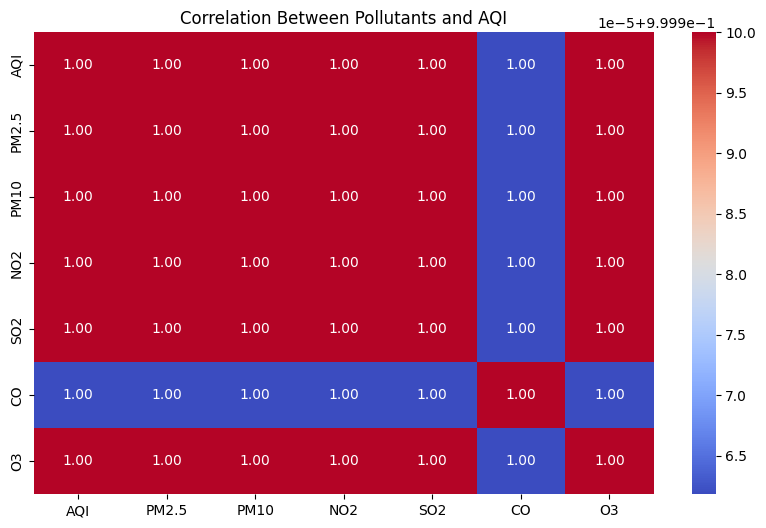

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Pollutants and AQI")
plt.show()



<Axes: xlabel='PM2.5', ylabel='AQI'>

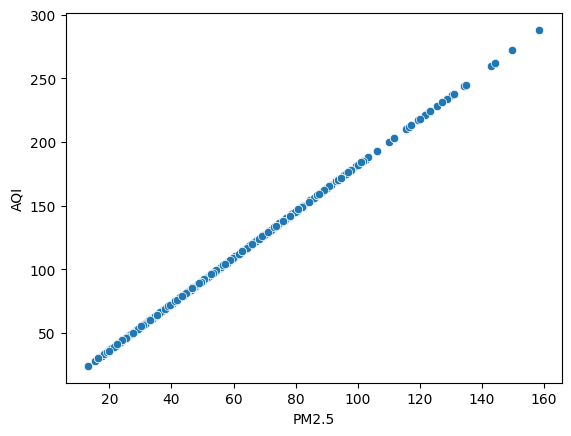

In [21]:
sns.scatterplot(x='PM2.5', y='AQI', data=df)



In [22]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # handles bad/missing values


In [23]:
df = df.sort_values('Date')


In [24]:
df.set_index('Date', inplace=True)


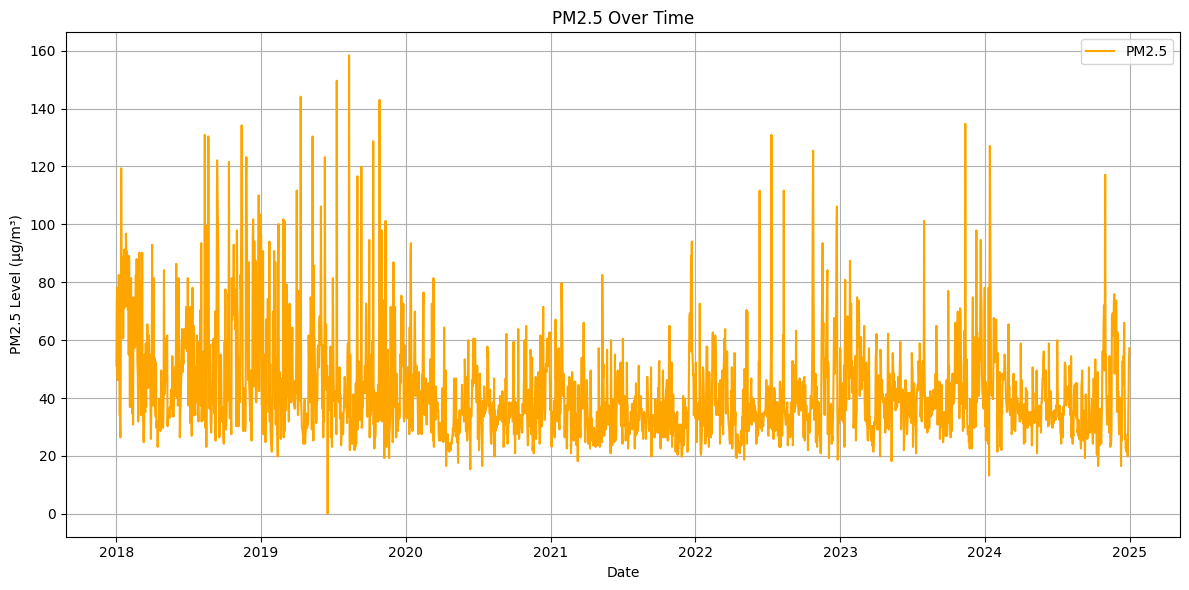

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PM2.5'], label='PM2.5', color='orange')
plt.xlabel("Date")
plt.ylabel("PM2.5 Level (µg/m³)")
plt.title("PM2.5 Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
